In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/alexattia/the-simpsons-characters-dataset'
od.download(dataset_url)

Skipping, found downloaded files in "./the-simpsons-characters-dataset" (use force=True to force download)


In [3]:
import os

char_path = ('/content/the-simpsons-characters-dataset/simpsons_dataset')
classes = os.listdir(char_path)
print(classes)

['edna_krabappel', 'apu_nahasapeemapetilon', 'waylon_smithers', 'abraham_grampa_simpson', 'krusty_the_clown', 'ralph_wiggum', 'moe_szyslak', 'maggie_simpson', 'lionel_hutz', 'rainier_wolfcastle', 'kent_brockman', 'martin_prince', 'troy_mcclure', 'bart_simpson', 'lisa_simpson', 'otto_mann', 'snake_jailbird', 'nelson_muntz', 'comic_book_guy', 'marge_simpson', 'miss_hoover', 'gil', 'ned_flanders', 'groundskeeper_willie', 'cletus_spuckler', 'milhouse_van_houten', 'lenny_leonard', 'simpsons_dataset', 'chief_wiggum', 'barney_gumble', 'homer_simpson', 'disco_stu', 'charles_montgomery_burns', 'sideshow_bob', 'principal_skinner', 'selma_bouvier', 'sideshow_mel', 'professor_john_frink', 'carl_carlson', 'patty_bouvier', 'fat_tony', 'mayor_quimby', 'agnes_skinner']


In [4]:
!pip install caer canaro

In [5]:
import caer
import canaro
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import gc

In [6]:
img_size = (80,80)
channel = 1

In [7]:
char_dict = {}
for char in os.listdir(char_path):
  char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
char_dict = caer.sort_dict(char_dict, True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_

In [8]:
characters = []
count = 0
for i in char_dict:
  characters.append(i[0])
  count += 1
  if count >= 10:
    break

In [9]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [10]:
train = caer.preprocess_from_dir(char_path, characters, img_size, channel, isShuffle=True)

Streaming output truncated to the last 5000 lines.
966 - marge_simpson
967 - marge_simpson
968 - marge_simpson
969 - marge_simpson
970 - marge_simpson
971 - marge_simpson
972 - marge_simpson
973 - marge_simpson
974 - marge_simpson
975 - marge_simpson
976 - marge_simpson
977 - marge_simpson
978 - marge_simpson
979 - marge_simpson
980 - marge_simpson
981 - marge_simpson
982 - marge_simpson
983 - marge_simpson
984 - marge_simpson
985 - marge_simpson
986 - marge_simpson
987 - marge_simpson
988 - marge_simpson
989 - marge_simpson
990 - marge_simpson
991 - marge_simpson
992 - marge_simpson
993 - marge_simpson
994 - marge_simpson
995 - marge_simpson
996 - marge_simpson
997 - marge_simpson
998 - marge_simpson
999 - marge_simpson
1000 - marge_simpson
1001 - marge_simpson
1002 - marge_simpson
1003 - marge_simpson
1004 - marge_simpson
1005 - marge_simpson
1006 - marge_simpson
1007 - marge_simpson
1008 - marge_simpson
1009 - marge_simpson
1010 - marge_simpson
1011 - marge_simpson
1012 - marge_simp

/usr/local/lib/python3.7/dist-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [11]:
len(train)

13811

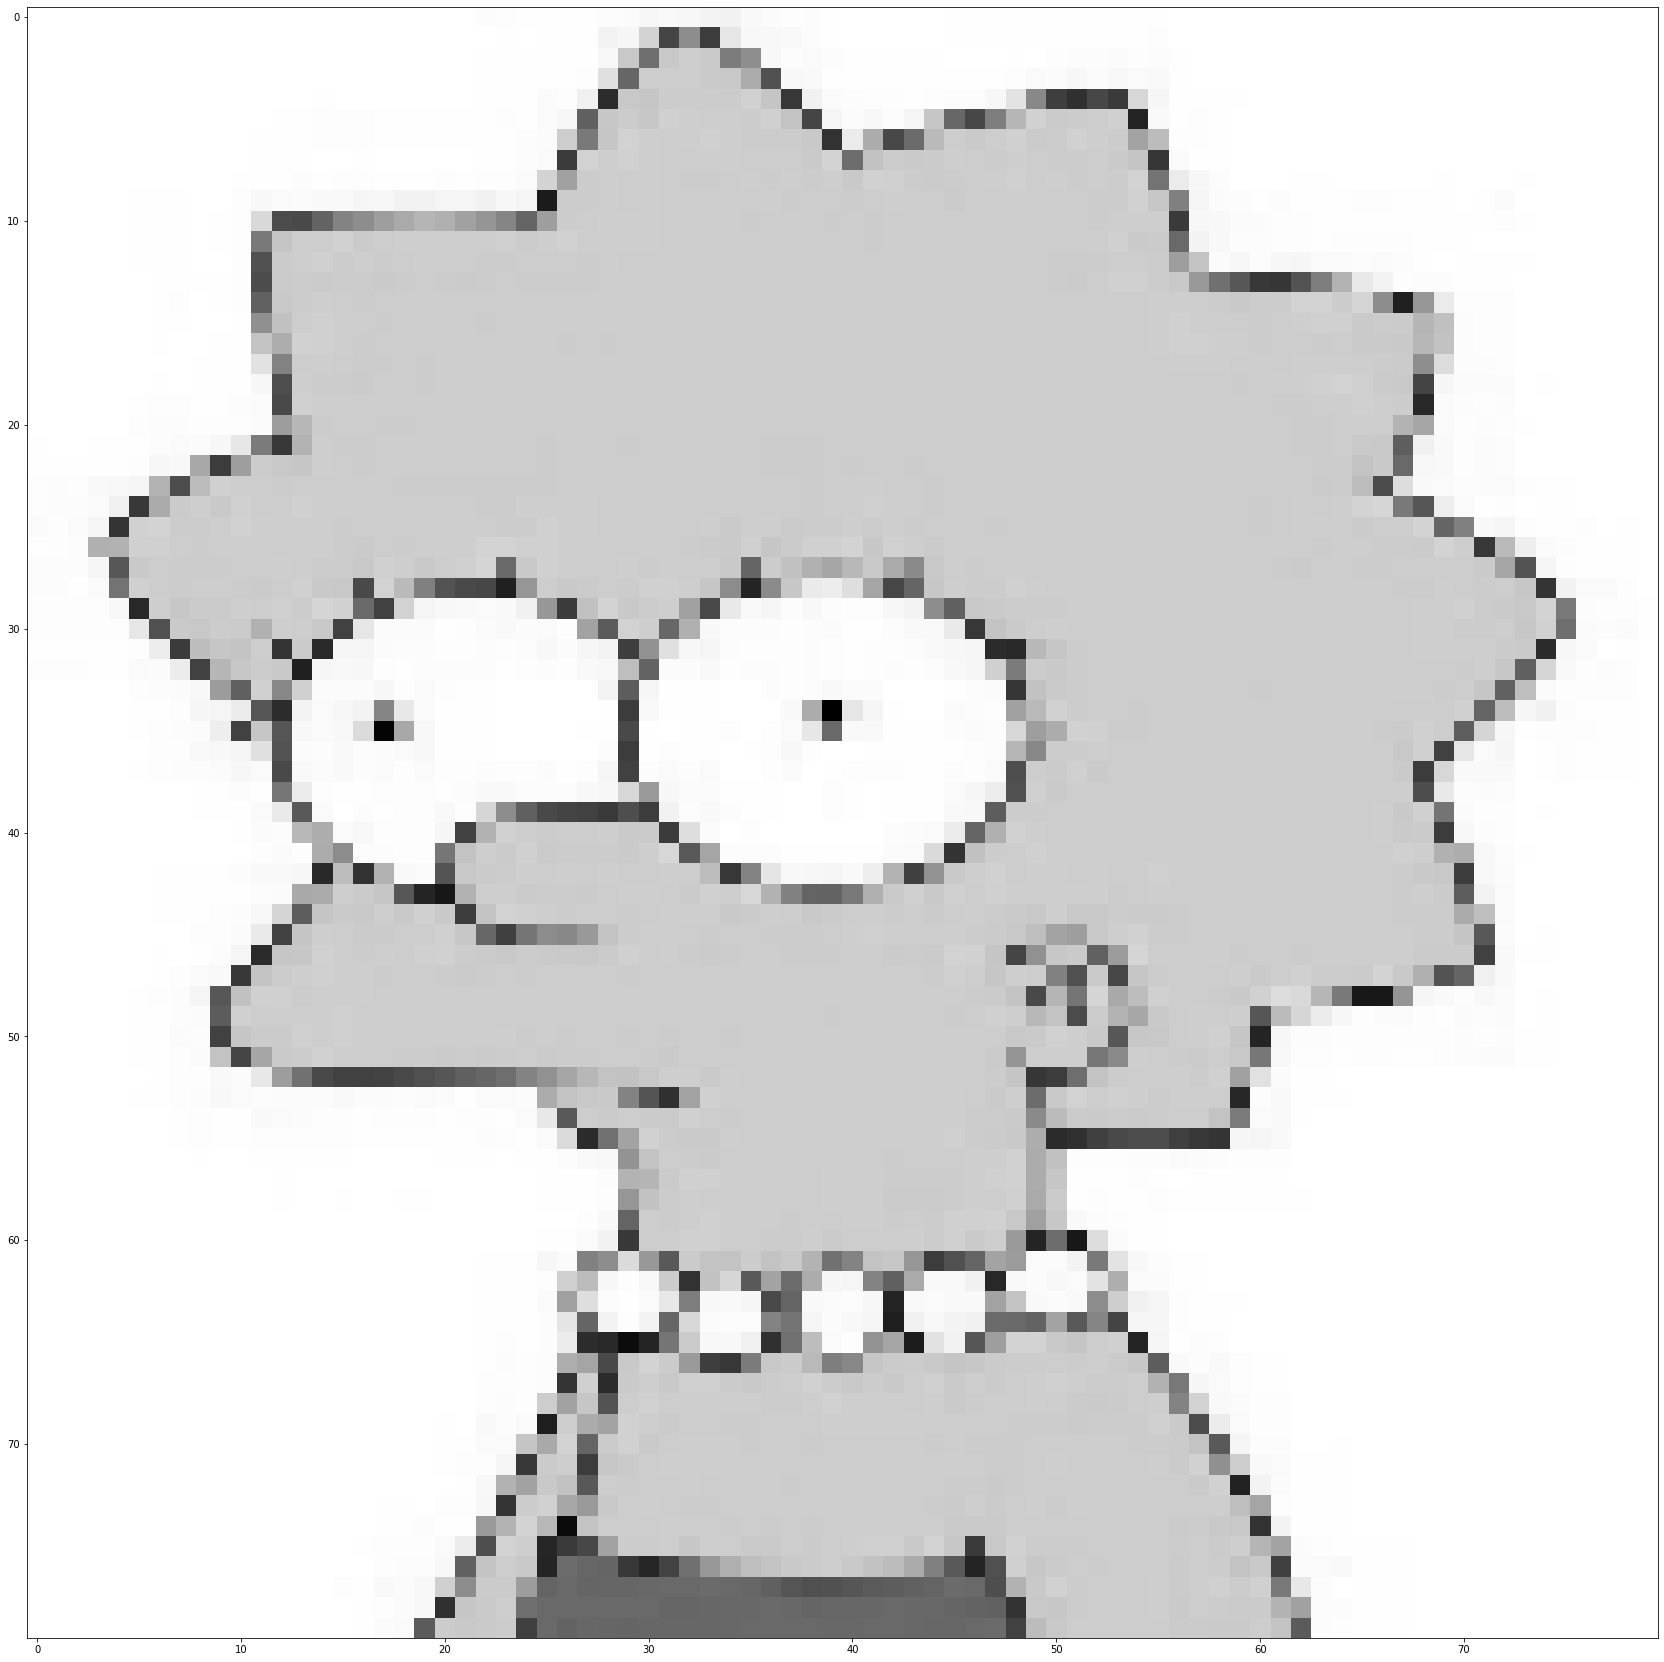

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,30))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [13]:
feature_set, labels = caer.sep_train(train, img_size)

In [14]:
feature_set = caer.normalize(feature_set)

In [15]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, len(characters))

In [16]:
import sklearn.model_selection as skm 
split_data = skm.train_test_split(feature_set, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

In [17]:
del train, feature_set, labels
gc.collect()

3116

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [19]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, 32)

In [20]:
model = canaro.models.createSimpsonsModel(img_size, 1, 10, loss='binary_crossentropy', decay =1e-6, learning_rate=0.001,momentum = 0.9, nesterov = True) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [22]:
training = model.fit(train_gen, batch_size=32, epochs=10, validation_data=(x_val, y_val), callbacks=callbacks_list)

Epoch 1/10
346/346 [==============================] - 15s 35ms/step - loss: 0.3384 - accuracy: 0.1552 - val_loss: 0.3345 - val_accuracy: 0.1582
Epoch 2/10
346/346 [==============================] - 12s 36ms/step - loss: 0.3233 - accuracy: 0.1631 - val_loss: 0.3346 - val_accuracy: 0.1582
Epoch 3/10
346/346 [==============================] - 13s 36ms/step - loss: 0.3222 - accuracy: 0.1644 - val_loss: 0.3306 - val_accuracy: 0.1629
Epoch 4/10
346/346 [==============================] - 11s 33ms/step - loss: 0.3131 - accuracy: 0.2035 - val_loss: 0.3142 - val_accuracy: 0.2599
Epoch 5/10
346/346 [==============================] - 11s 33ms/step - loss: 0.3062 - accuracy: 0.2343 - val_loss: 0.3059 - val_accuracy: 0.2827
Epoch 6/10
346/346 [==============================] - 12s 33ms/step - loss: 0.3024 - accuracy: 0.2560 - val_loss: 0.2998 - val_accuracy: 0.3000
Epoch 7/10
346/346 [==============================] - 12s 35ms/step - loss: 0.3000 - accuracy: 0.2648 - val_loss: 0.2945 - val_accuracy:

In [23]:
training = model.fit(train_gen, batch_size=32, epochs=10, validation_data=(x_val, y_val), callbacks=callbacks_list)

Epoch 1/10
346/346 [==============================] - 12s 34ms/step - loss: 0.2883 - accuracy: 0.3100 - val_loss: 0.2776 - val_accuracy: 0.3768
Epoch 2/10
346/346 [==============================] - 13s 36ms/step - loss: 0.2852 - accuracy: 0.3274 - val_loss: 0.2749 - val_accuracy: 0.3898
Epoch 3/10
346/346 [==============================] - 12s 35ms/step - loss: 0.2822 - accuracy: 0.3391 - val_loss: 0.2731 - val_accuracy: 0.4032
Epoch 4/10
346/346 [==============================] - 12s 34ms/step - loss: 0.2781 - accuracy: 0.3494 - val_loss: 0.2701 - val_accuracy: 0.4206
Epoch 5/10
346/346 [==============================] - 12s 35ms/step - loss: 0.2741 - accuracy: 0.3608 - val_loss: 0.2626 - val_accuracy: 0.4358
Epoch 6/10
346/346 [==============================] - 12s 35ms/step - loss: 0.2698 - accuracy: 0.3806 - val_loss: 0.2624 - val_accuracy: 0.4430
Epoch 7/10
346/346 [==============================] - 11s 33ms/step - loss: 0.2658 - accuracy: 0.3903 - val_loss: 0.2575 - val_accuracy:

In [24]:
training = model.fit(train_gen, batch_size=32, epochs=10, validation_data=(x_val, y_val), callbacks=callbacks_list)

Epoch 1/10
346/346 [==============================] - 12s 33ms/step - loss: 0.2475 - accuracy: 0.4507 - val_loss: 0.2276 - val_accuracy: 0.5342
Epoch 2/10
346/346 [==============================] - 11s 32ms/step - loss: 0.2429 - accuracy: 0.4602 - val_loss: 0.2231 - val_accuracy: 0.5309
Epoch 3/10
346/346 [==============================] - 11s 32ms/step - loss: 0.2389 - accuracy: 0.4747 - val_loss: 0.2172 - val_accuracy: 0.5566
Epoch 4/10
346/346 [==============================] - 12s 35ms/step - loss: 0.2329 - accuracy: 0.4901 - val_loss: 0.2136 - val_accuracy: 0.5653
Epoch 5/10
346/346 [==============================] - 12s 36ms/step - loss: 0.2272 - accuracy: 0.5063 - val_loss: 0.2063 - val_accuracy: 0.5885
Epoch 6/10
346/346 [==============================] - 12s 34ms/step - loss: 0.2227 - accuracy: 0.5199 - val_loss: 0.2095 - val_accuracy: 0.5983
Epoch 7/10
346/346 [==============================] - 11s 33ms/step - loss: 0.2188 - accuracy: 0.5304 - val_loss: 0.2032 - val_accuracy:

In [25]:
training = model.fit(train_gen, batch_size=32, epochs=10, validation_data=(x_val, y_val), callbacks=callbacks_list)

Epoch 1/10
346/346 [==============================] - 12s 34ms/step - loss: 0.2006 - accuracy: 0.5803 - val_loss: 0.1791 - val_accuracy: 0.6551
Epoch 2/10
346/346 [==============================] - 11s 33ms/step - loss: 0.1965 - accuracy: 0.5919 - val_loss: 0.1859 - val_accuracy: 0.6428
Epoch 3/10
346/346 [==============================] - 11s 33ms/step - loss: 0.1909 - accuracy: 0.6035 - val_loss: 0.1736 - val_accuracy: 0.6594
Epoch 4/10
346/346 [==============================] - 11s 33ms/step - loss: 0.1869 - accuracy: 0.6210 - val_loss: 0.1726 - val_accuracy: 0.6656
Epoch 5/10
346/346 [==============================] - 12s 36ms/step - loss: 0.1828 - accuracy: 0.6293 - val_loss: 0.1673 - val_accuracy: 0.6840
Epoch 6/10
346/346 [==============================] - 12s 36ms/step - loss: 0.1798 - accuracy: 0.6294 - val_loss: 0.1613 - val_accuracy: 0.6960
Epoch 7/10
346/346 [==============================] - 12s 33ms/step - loss: 0.1749 - accuracy: 0.6407 - val_loss: 0.1595 - val_accuracy:

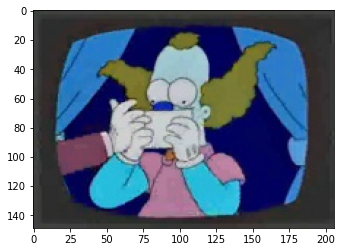

In [53]:
test_path = r'/content/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_13.jpg'
img = cv.imread(test_path)
plt.imshow(img)
plt.show()

In [54]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, img_size)
    image = caer.reshape(image, img_size, 1)
    return image

In [55]:
predictions = model.predict(prepare(img))

In [56]:
print(characters[np.argmax(predictions[0])])

krusty_the_clown
